# 13. 인공 신경망(ANN)과 역전파(Back-propagation)

## 인공신경망 (Artificial Neural Network)
- 뇌의 학습방법을 수학적으로 모델링한 기계학습 알고리즘
- 입력층, 히든층, 출력층으로 구성
- 각 뉴런의 출력은 직접 전달되는 정보에만 의존할 뿐, 다른 정보들과는 무관
- 이 때문에 병렬처리가 가능하므로 연산속도가 매우 빠름

---

## 손실함수(Loss or Cost function)
- 신경망에서 내놓는 결과값과 실제 결과값 사이의 차이를 정의하는 함수
- 신경망을 학습할 때 학습 상태에 대해 측정하는 지표 
- 가중치의 값들이 최적화 될 수 있도록 찾는 과정에서 학습이 잘되는지를 판단한기준

### MSE(Mean Square Error)
- 손실함수의 값이 클수록 오답, 작을수록 정답에 가까움 
- 오차(정답, 예측)를 제곱하여 평균계산

### 교차 엔트로피(Cross Entropy)
- 자연로그(예측값)와 정답의 곱, 전체 값을 합한 후 음수로 변환
- 교차 엔트로피는 One-hot coding(정답1, 나머지는 0으로 간주)
- ex) 실제 값(1), 예측 값(0.6)이면 -log(0.6)=0.51

### Softmax
- 회귀에 사용되는 활성화함수: 입력 그대로 출력 
- 분류에 사용되는 활성화함수: 모든 입력 신호로 부터 영향을 받음

### 신경망 학습의 목표
손실함수를 최소화 하는 것. 이를 위해 SGD 등의 학습 알고리즘 사용

### 회귀(Regression)
손실함수로 제곱오차(Mean-squared error)를 사용

### 분류(Classification)
활성화 함수로 소프트맥스(Softmax) 함수, 손실함수로 크로스 엔트로피(Cross entropy)를 사용

---
## 학습 알고리즘

### 경사하강법(Gradient Descent)
1. 네트워크의 parameter들을 θ라고 했을 때, 손실함수 J(θ)의 값을 최소화하기 위해 기울기(gradient) ∇J(θ)를 이용하는 방법 
2. GD에서는 gradient의 반대 방향으로 일정 크기만큼 이동하는 것을 반복하여 손실함수의 값을 최소화하는 θ의 값을 찾음
3. 이 때 η는 미리 정해진 걸음의 크기(step size)로, 학습률(learning rate)이라고 함. 보통 0.01~0.001 정도를 사용

### 학습률(Learning rate) 
- 학습률이 너무 크면 듬성듬성하고 최소값(global minimum)을 지나쳐 갈수 있음 
- 학습률이 너무 작으면 학습을 촘촘히 해서 학습속도가 느려지고 극소값(Local minimum)에 빠질 수 있음

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4953 - accuracy: 0.8271
Epoch 2/3
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3709 - accuracy: 0.8658
Epoch 3/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3318 - accuracy: 0.8792
10000/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


- TEST 정확도 : 0.8656

- train image shape : 
 tf.Tensor([60000    28    28], shape=(3,), dtype=int32)

- train labels length : 
 60000 60000

- train labels : 
 [9 0 0 ... 3 0 5]

- test image shape : 
 tf.Tensor([10000    28    28], shape=(3,), dtype=int32)

- test labels length : 
 10000


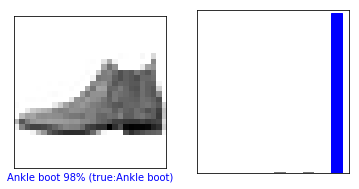

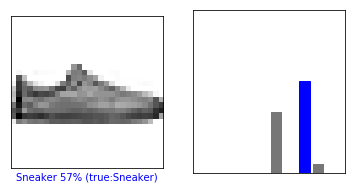

In [4]:
# [Keras로 살펴보는 ANN]

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

def main():

    # Fashion mnist data 를 load 합니다.
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # label에 해당하는 class name 입니다.
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


    # 2-layer 모델을 생성합니다.
    model = keras.Sequential([
        # x data가 2차원인 것을 1차원으로 변경해줍니다.
        keras.layers.Flatten(input_shape=(28, 28)),
        # 첫번째 layer의 뉴런 개수를 정합니다.
        keras.layers.Dense(128, activation=tf.nn.relu), #활성화 함수는 대부분 nn(neural net)안에 있음.
        # 두번째 layer의 뉴런 개수를 정합니다. (output)
        keras.layers.Dense(10, activation=tf.nn.softmax) 
    ])

    # 모델의 상세 기법을 정의합니다.
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']) #metrics=['accuracy','precision'] 이렇게 해줘도됨.

    # 모델을 train image, train label을 가지고 학습시킵니다.
    model.fit(train_images, train_labels, epochs=3) 


    # 모델의 loss와 accuracy를 계산합니다.
    test_loss, test_acc = model.evaluate(test_images, test_labels)

    print('\n- TEST 정확도 :', test_acc)


    # 학습한 모델로 테스트 데이터를 예측합니다.
    predictions = model.predict(test_images)

    # train_image의 shape를 출력
    print("\n- train image shape : \n", tf.shape(train_images) )
    
    # train_labels의 데이터 개수를 출력
    print("\n- train labels length : \n", len(train_labels), tf.size(train_labels).numpy())
    
    # train_labels를 출력
    print("\n- train labels : \n", train_labels)
    
    # test_image의 shape를 출력
    print("\n- test image shape : \n", tf.shape(test_images))
    
    # test_labels의 데이터 개수를 출력
    print("\n- test labels length : \n", tf.size(test_labels).numpy())
    

    # test_images의 0번째 data를 제대로 맞췄는지 확인해봅니다.
    i = 0
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images, class_names)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.savefig('ANN.png')

    # test_images의 12번째 data를 제대로 맞췄는지 확인해봅니다.
    i = 12
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images, class_names)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.savefig('ANN.png')

def plot_image(i, predictions_array, true_label, img, class_names):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% (true:{})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


if __name__ == "__main__":
    main()

---
## 역전파법 (Back Propagation)
loss function에서 각 가중치(weights)에 대해 미분을 진행하여, 그 미분값의 반대방향으로 gradient descent를 하기 위해 사용되는 기법.<br>
가중치의 미분값은 결과인 loss function에 대한 기울기이자, 1만큼 증가할 때의 변화량을 의미한다.<br>
Back propagation을 위해서 Chain rule 방법으로 복잡한 미분을 간단하게 계산한다.

### 계산 그래프
- 계산 과정을 그래프로 나타낸 것
- 노드(node)와 엣지(edge)로 표현
- 노드는 연산을, 엣지는 데이터가 흘러가는 방향을 나타냄

In [6]:
# [sigmoid back propagation 연산 구현]

import numpy as np

def main():
    # Input 값을 다음과 같이 할당합니다.
    w_0 = 2; x_0 = -1; w_1 = -3; x_1 = -2; w_2 = -3

    # Forward propatation 은 차례로 모델의 값을 입력하는 방식입니다.
    # f(w, x) 를 다음과 같이 각 재정의를 통해서 선언합니다.
    h = -(w_0*x_0+w_1*x_1+w_2)
    g = 1+np.exp(h)
    f = 1/g

    # 거꾸로 Back propagation을 진행해봅시다:
    # 첫번째 미분 대상은 f = 1 / g 입니다.
    dfdg = -1/(g**2)

    # 다음 미분 대상은 g = 1 + exp(h) 입니다.
    dgdh = np.exp(h)
    
    # 세번째 미분 대상은 h = -(w_0 * x_0 + w_1 * x_1 + w_2) 입니다.
    dhdw_0 = -x_0
    dhdx_0 = -w_0
    dhdw_1 = -x_1
    dhdx_1 = -w_1
    dhdw_2 = -1

    # Chain rule 을 적용하여 값을 구해보세요.
    dfdw_0 = dfdg*dgdh*dhdw_0
    dfdx_0 = dfdg*dgdh*dhdx_0
    dfdw_1 = dfdg*dgdh*dhdw_1
    dfdx_1 = dfdg*dgdh*dhdx_1
    dfdw_2 = dfdg*dgdh*dhdw_2
    
    return dfdw_0, dfdx_0, dfdw_1, dfdx_1, dfdw_2


if __name__ == "__main__":
    main()